# Análise dos Dados do Airbnb - Quebec

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Quebec, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2021-09-09/visualisations/listings.csv")
df = df.drop('number_of_reviews_ltm', axis=1)

## Análise dos Dados


**Dicionário das variáveis**

* id --> Representa o identificador do imóvel;
* name --> Representa o nome do imóvel cadastrado;
* host_id --> Representa o identificador do usuário responsável pelo imóvel;
* host_name --> Representa o nome do anfitrião responsável pelo imóvel;
* neighbourhood_group --> Representa o nome do grupo de bairros em que o imóvel está localizado;
* neighbourhood --> Representa o nome do bairro/vizinhança em que o imóvel está localizado;
* latitude --> Latitude do imóvel;
* longitude --> Longitude do imóvel;
* room_type --> Representa o tipo de imóvel;
* price --> Representa o valor da diária do imóvel;
* minimum_nights --> Representa a quantidade mínima de pernoites permitidas no imóvel;
* number_of_reviews --> Número de avaliações realizadas para o imóvel;
* last_review --> Data da última avaliação realizada por um usuário;
* reviews_per_month --> Quantidade de avaliações recebidas por mês;
* calculated_host_listing_counts --> Quantidade de cadastros realizados para um mesmo host;
* availability_365 --> Quantidade de dias em que o imóvel fica disponível para locação dentro de um ano;
* license --> Imóvel possui algum tipo de licença especial?

In [5]:
# Exemplo com as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,license
0,54334,Beau logement avec vue magnifique sur les mont...,254811,Charlotte,NaN,Quartier 5-1,46.91400,-71.19565,Entire home/apt,115,2,94,2019-08-27,0.76,1,340,NaN
1,138381,Bed & Breakfast La California,675584,Mary,NaN,Sillery,46.76843,-71.26636,Private room,145,1,155,2021-08-21,1.27,2,359,NaN
2,198548,Fabulous view - Central - Ideal work from home,960772,Marianne,NaN,Saint-Roch,46.81169,-71.22522,Entire home/apt,150,30,51,2019-11-12,0.42,1,191,NaN
3,214967,Au bord du fleuve/Beach house,1110010,Julie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.80286,-71.21271,Private room,88,3,169,2021-08-27,1.53,1,342,NaN
4,268812,Apartment Old city Quebec condo,1408583,Émilie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.81023,-71.21082,Entire home/apt,40,30,77,2018-05-11,0.65,1,0,NaN


### **Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os formatos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t{df.shape[0]}")
print(f"Atributos:\t{df.shape[1]}")
print("-----------------------------------------")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	2250
Atributos:	17
-----------------------------------------


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.988444
reviews_per_month                 0.146667
last_review                       0.146667
host_name                         0.000444
latitude                          0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
room_type                         0.000000
longitude                         0.000000
availability_365                  0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

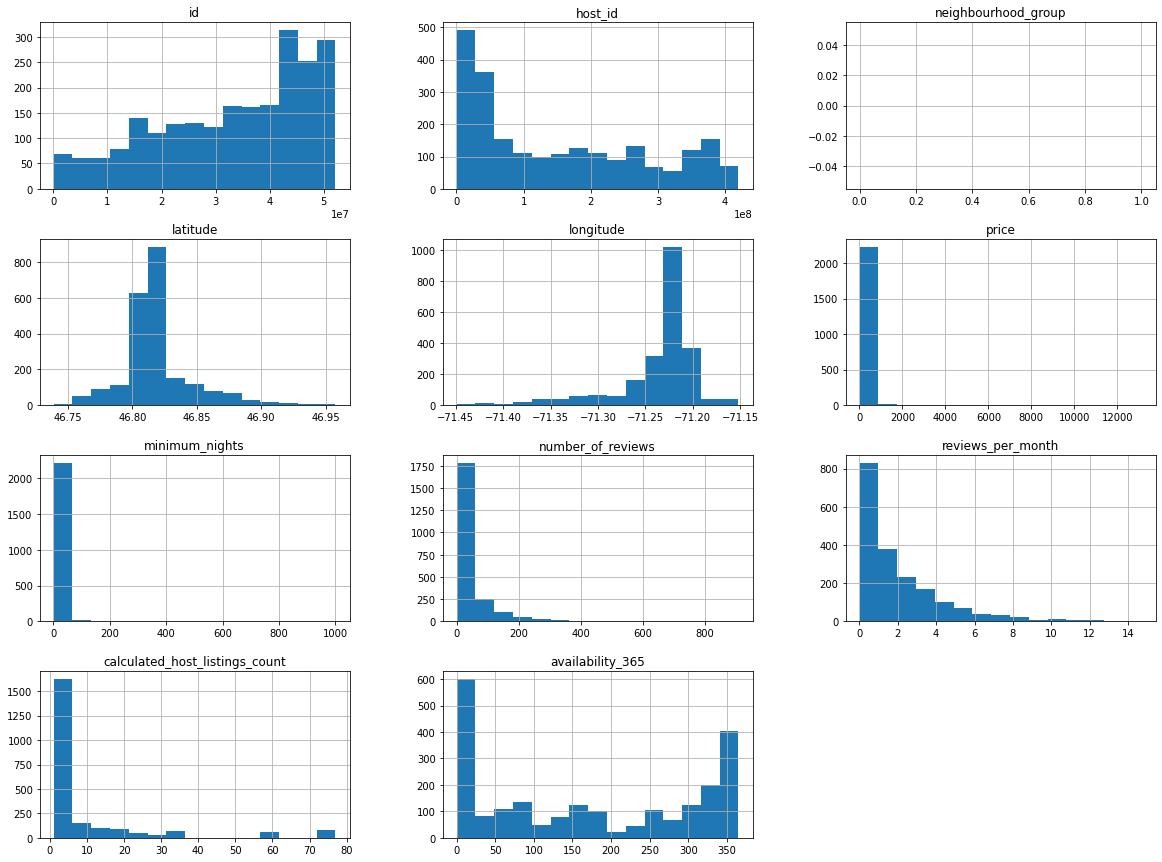

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15));

### **Q4. Temos Outliers no dataset?**

In [9]:
# Resumo estatístico dos valores com maiores discrepância nos histogramas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2250.000000,2250.000000,2250.000000,1920.000000,2250.000000,2250.000000
mean,158.738667,11.612444,40.369778,2.051807,9.521778,170.652444
std,433.188779,50.380429,71.368751,2.327631,17.357889,139.975673
min,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.250000,1.000000,2.000000,0.380000,1.000000,10.000000
50%,105.000000,2.000000,11.000000,1.240000,2.000000,160.000000
75%,176.750000,4.000000,47.000000,2.935000,8.000000,322.000000
max,13127.000000,1000.000000,907.000000,14.710000,77.000000,365.000000


Analisando o resumo gerado, podemos tirar algumas conclusões, como por exemplo:
* O preço dos imóveis, em 75% da base está abaixo de 176,75. Porém, o valor máximo deste atributo é de 13.127,00.
* No atributo ***minimum_nights*** temos um valor máximo de 1.000 noites, valor este, próximo a 3 anos.

### Análise de ***price***

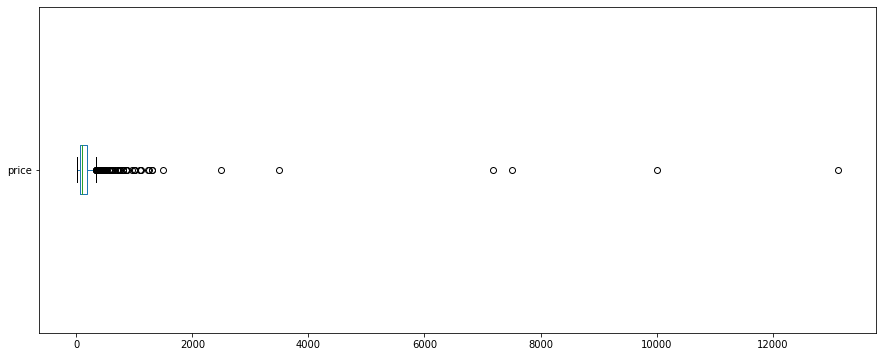

São somente 15 preços acima de 1000 ou 0.67% da base total


In [10]:
#boxplot de price
df.price.plot(kind='box', vert=False, figsize = (15,6))
plt.show()

#Ver preços acima de 1000 reais
print(f"São somente {len(df[df.price >1000])} preços acima de 1000 ou {(len(df[df.price >1000]) / df.shape[0])*100:.2f}% da base total")

### Análise de ***minimum_nights***

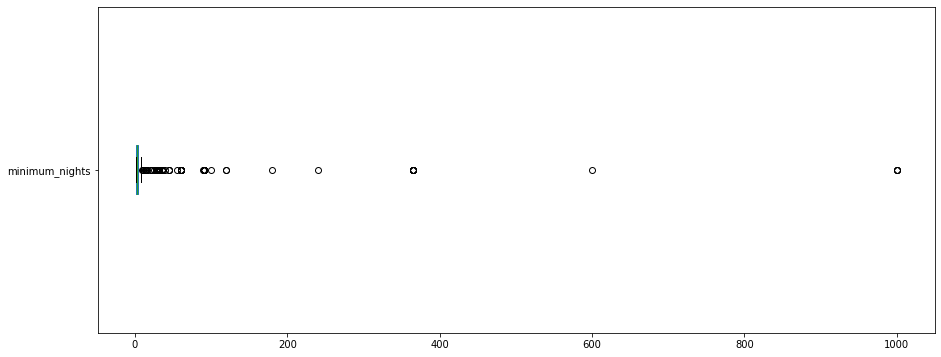

São somente 49 imóveis com mais de 40 noites mínimas de estadia  2.18% da base total


In [11]:
#boxplot de price
df.minimum_nights.plot(kind='box', vert=False, figsize = (15,6))
plt.show()

#Ver minimum_nights acima de 40 dias
print(f"São somente {len(df[df.minimum_nights >40])} imóveis com mais de 40 noites mínimas de estadia  {(len(df[df.minimum_nights >40]) / df.shape[0])*100:.2f}% da base total")

### Visão com Outliers removidos

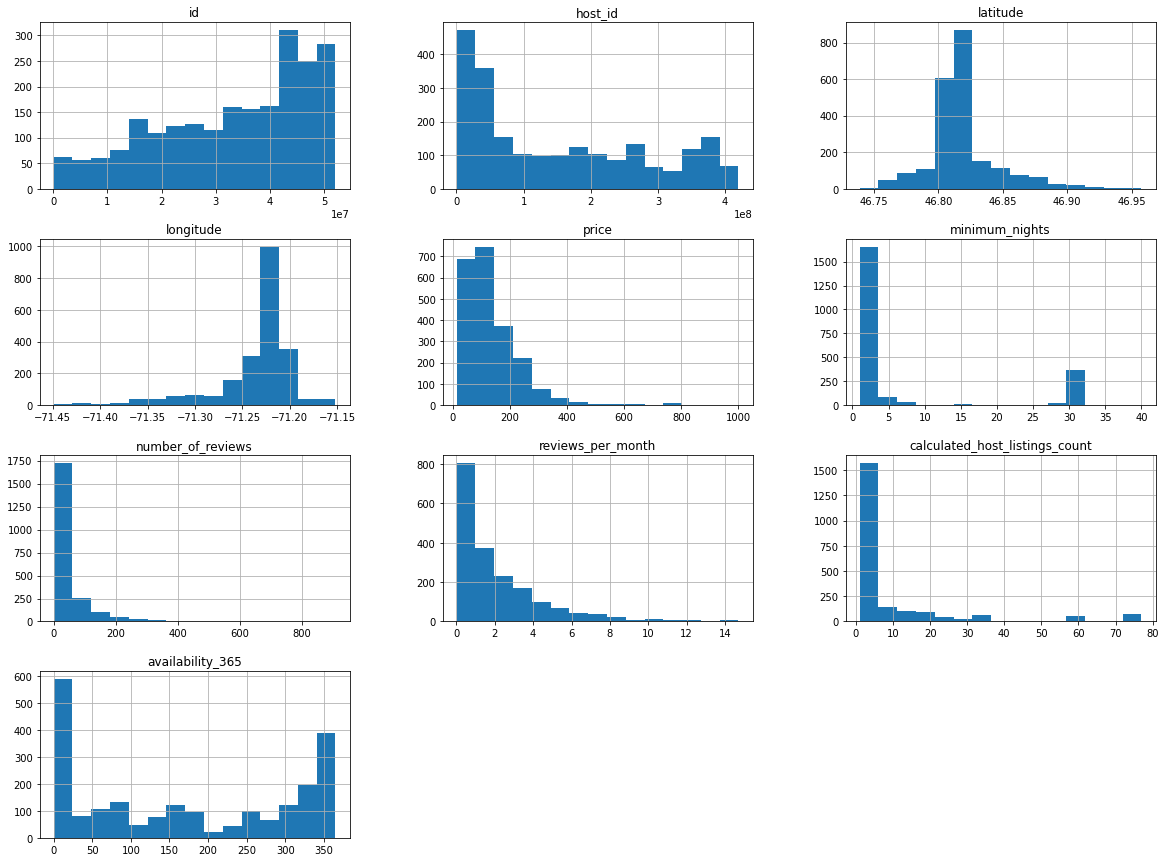

In [12]:
#cria uma cópia do dataframe, sem os dados definidos como outlier
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis = 0, inplace = True)

#remove a coluna 'neighbourhood_group', pois está sem dados
df_clean.drop('neighbourhood_group', axis=1, inplace = True)

#plotagem do histograma sem ouliers
df_clean.hist(bins = 15, figsize=(20,15));

### **Q4. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna `price``
print(f"Temos como média de preço na cidade o valor de {round(df_clean.price.mean(),2)} reais a diária.")


Temos como média de preço na cidade o valor de 136.49 reais a diária.


### **Q4. Qual a correlação existente entre as variáveis**

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.216848,-0.083033,-0.034327,0.235102,0.201295
minimum_nights,-0.216848,1.000000,-0.125002,-0.246942,-0.063488,0.045914
number_of_reviews,-0.083033,-0.125002,1.000000,0.423267,-0.154464,0.015730
reviews_per_month,-0.034327,-0.246942,0.423267,1.000000,-0.149619,0.113159
calculated_host_listings_count,0.235102,-0.063488,-0.154464,-0.149619,1.000000,0.272370
availability_365,0.201295,0.045914,0.015730,0.113159,0.272370,1.000000


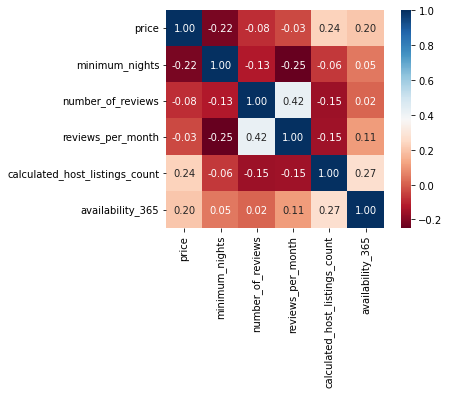

In [21]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [22]:
# mostrar a quantidade de cada tipo de imóvel disponível
display(df_clean.room_type.value_counts())

Entire home/apt    1697
Private room        438
Hotel room           34
Shared room          19
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
display(df_clean.room_type.value_counts() / df.shape[0]*100)

Entire home/apt    75.422222
Private room       19.466667
Hotel room          1.511111
Shared room         0.844444
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [24]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vieux-Québec/Cap-Blanc/Colline parlementaire    188.672956
Quartier 5-1                                    188.000000
Quartier 4-5                                    171.611111
Saint-Roch                                      159.728916
Des Châtels                                     146.333333
Pointe-de-Sainte-Foy                            138.800000
Lac-Saint-Charles                               137.947368
Neufchâtel-Est/Lebourgneuf                      137.317073
Quartier 4-2                                    134.428571
Quartier 5-2                                    132.666667
Name: price, dtype: float64

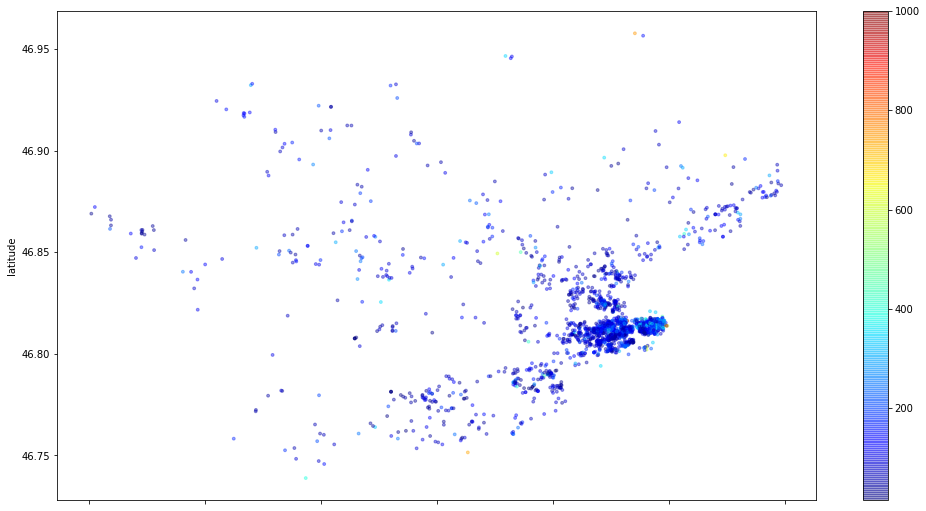

In [25]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(17,9));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [27]:
# ver a média da coluna `minimum_nights``
print(f'A média de quantidade mínima de noites é {round(df_clean.minimum_nights.mean(),0)} dias.')

A média de quantidade mínima de noites é 7.0 dias.


## Conclusões
